# **PRACTICAL QUESTION**

a. Explore the data and perform simple linear regression                          
b. Display a scatter plot with a regression line                                                                              
c. Use the coefficient and intercept values calculated by the estimator to make predicitions for 2019



# ***Introduction***

*From the temperature dataset provided, we need to examine the relationship that exists betweeen the date(year) and the temperature values. To do this we will need to use a simple linear regression algorithm to develop the right algorithm and consequently develop a plot for the equation to effectively predict the outcome of other datapoints(years)*

# ***Preparing and Exploring the dataset***

*First, we will load the dataset into our workspace and view it to determine its nature and how best to analyse it. To do this we will need to import the necessary libraries to perform the actions we need.*

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

*Loading the dataset*

In [30]:
myDataset = pd.read_csv('temp_nyc_1895-2018.csv')

*Getting a first look into what the datset holds*

In [31]:
myDataset.columns

Index(['Date', 'Value', 'Anomaly'], dtype='object')

In [32]:
myDataset

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0
...,...,...,...
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4


*From the dataset it is clear thet we need to resolve the date so that interpretation is easier, hence we need to remove the month part "01" of the date to remain only with the year.* 

In [33]:
myDataset.Date = myDataset.Date.floordiv(100)

In [34]:
myDataset

,Date,Value,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0
...,...,...,...
119,2014,35.5,-1.9
120,2015,36.1,-1.3
121,2016,40.8,3.4
122,2017,42.8,5.4


# ***Defining the variables***

Before we proceed to develop the regression algorithm we will need to identify our indepentent variable (x) and the dependent variable (y). In this case we will try to prove and show how the temperature depends on the year, and consequently develop an equation to predict other years.

In [35]:
x = myDataset.iloc[:, 0].values
y = myDataset.iloc[:, -2].values

*showing our variables*

In [36]:
print("Independent Variable(Years)", x)

Independent Variable(Years) [1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908
 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922
 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936
 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950
 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964
 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]


In [37]:
print("Dependent variable(Temperature values)", y)

Dependent variable(Temperature values) [34.2 34.7 35.5 39.6 36.4 37.4 37.  35.  35.5 29.8 33.7 42.3 40.5 38.3
 39.6 36.1 40.7 29.3 46.9 36.9 38.9 42.3 38.4 26.5 40.6 29.7 39.7 33.4
 35.2 39.4 33.8 37.2 36.8 40.  37.8 38.5 38.2 47.6 45.6 39.8 35.  34.3
 45.7 37.3 36.8 30.  34.5 36.5 36.1 39.  31.5 40.2 43.  30.1 43.5 47.6
 42.5 42.4 42.4 37.  35.6 36.2 33.8 36.4 37.1 37.8 31.9 38.  34.6 40.2
 34.  37.1 41.6 31.7 35.7 29.9 31.5 40.5 40.6 39.7 41.7 32.6 26.1 32.3
 38.6 38.  30.6 30.9 38.  33.5 33.  39.3 35.9 34.2 42.4 46.  39.6 40.9
 41.  31.6 42.6 37.  39.2 45.8 40.8 37.8 38.8 45.4 32.9 31.  37.4 47.6
 43.6 42.4 33.4 38.1 34.8 44.2 40.8 35.5 36.1 40.8 42.8 38.7]


# ***Splitting the variables into test and training data***

When developing a simple regression model, it is paramount that we split the data into a test and training set, to give our model enough data test on and still remain with enough to check the accuracy of our model. We will split the data 80% to 20%,training and test respectively, because this is the sweet spot for giving the model enough data to practice on and still have enough for prediction accuracy.

To split the data we will use the regressor whiich is inbuilt in scikit learn

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

*We use a random state of zero to ensure the data is ssampled, avoiding a case where data is compromised toards the end of the data sent. In developing a regression model it is important to sample the training data from the entire pool.*

To use the training and test datasets we will need to first reshape them

In [39]:
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# ***Training the simple regression model***

Here we will again borrow a function from scikit learn, *LinearRegression*, we will train our model on *x_train* and *y_train* our training sets. The model will learn from this training dataset.

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

After training our dataset we can try and see the predictions it gives on our test data, that is using the regressor on the test data set.

In [41]:
predict_test_data = regressor.predict(x_test) 

In [42]:
predict_test_data

array([[37.00698558],
       [37.56109362],
       [37.46874228],
       [37.21807436],
       [37.73260325],
       [38.19435995],
       [37.61386581],
       [38.08881556],
       [36.99379253],
       [38.36586958],
       [37.03337168],
       [37.83814764],
       [38.1811669 ],
       [37.53470752],
       [38.03604337],
       [36.92782729],
       [38.207553  ],
       [38.00965727],
       [37.19168826],
       [37.49512838],
       [37.64025191],
       [38.10200861],
       [38.12839471],
       [37.70621715],
       [37.11252997]])

# ***Visualizing the model***

To visualize the model we will draw a scatter plot then fit the regressor line on it. We will use the *matplotlib* library to achieve this. Plotting the years against the temperature values



# ***Visualizing the reggressor line on the training set***

This is a visual on the training set to see how well our line fits on it.

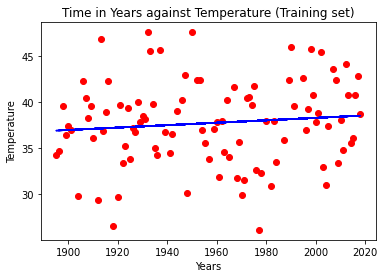

In [43]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Time in Years against Temperature (Training set)')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.show()

# ***Visualizing the reggressor line on the test set***

Here we will use our trained regressor line on the the test data set

Remember the test predictions it had already made on the test data *predict_test_data*

In [44]:
predict_test_data

array([[37.00698558],
       [37.56109362],
       [37.46874228],
       [37.21807436],
       [37.73260325],
       [38.19435995],
       [37.61386581],
       [38.08881556],
       [36.99379253],
       [38.36586958],
       [37.03337168],
       [37.83814764],
       [38.1811669 ],
       [37.53470752],
       [38.03604337],
       [36.92782729],
       [38.207553  ],
       [38.00965727],
       [37.19168826],
       [37.49512838],
       [37.64025191],
       [38.10200861],
       [38.12839471],
       [37.70621715],
       [37.11252997]])

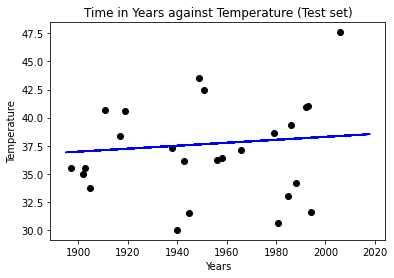

In [45]:
plt.scatter(x_test, y_test, color = 'black')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Time in Years against Temperature (Test set)')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.show()

To put the ability of our regressor in perspective here is a plot with both test and training data sets used.

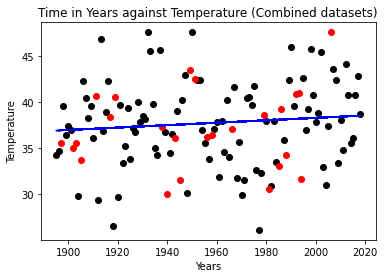

In [46]:
plt.scatter(x_train, y_train, color = 'black')
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Time in Years against Temperature (Combined datasets)')
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.show()

# ***Finding the linear equation of the regressor***

Simple linear regression models form a simple linear equation that explains the relationship between the two variable in the format *y = mx + c*


> Where m represents the slope of the line and c represents the *y*-intercept



Finding the slope

In [47]:
print("Slope = ", regressor.coef_)

Slope =  [[0.01319305]]


Finding the *y*-intercept

In [48]:
print("Intercept = ", regressor.intercept_)

Intercept =  [11.90061412]


Now that we have found the *y*-intercept and the slope of the line we can derrive a linear equation for the model using the previously discussed format. Therefore the equation of the line is:

> ***y = 0.01319305X + 11.90061412***



After establishing this equation we can then use it to solve for the temperatures of years that were not present in the dataset. To test this out we will predict the annual temperature of 2019

*y* the temperatre  = (0.01319305 X 2019) + 11.90061412

> *y = 26.63676795 + 11.90061412*


> *y* = 38.53738207 





Therefore the predicted temperature of 2019 is *38.53738207*